# Linear Regression Model in Keras

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ttest

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import tensorflow as tf
from tensorflow import keras

### Objective : To predict the prices of house using eight different independent variables.

### Importing Dataset

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Number of Instance: 20640
### Number of Attributes: 8 Numeric, predictive attributes and the target

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train_full,X_test, y_train_full,y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train,X_valid, y_train,y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
X_train.shape

(11610, 8)

### Creating structure for Neural Network

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

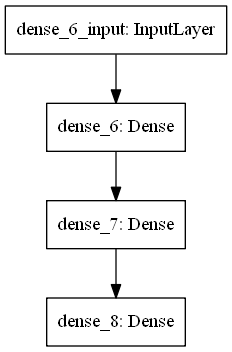

In [15]:
import pydot
keras.utils.plot_model(model)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


### Compiling Model

In [17]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [18]:
model_history =model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 849us/step - loss: 1.4581 - mae: 0.8737 - val_loss: 0.8261 - val_mae: 0.6809
Epoch 2/20
363/363 [==============================] - 0s 569us/step - loss: 0.7368 - mae: 0.6366 - val_loss: 0.6971 - val_mae: 0.6198
Epoch 3/20
363/363 [==============================] - 0s 558us/step - loss: 0.6516 - mae: 0.5904 - val_loss: 0.6317 - val_mae: 0.5832
Epoch 4/20
363/363 [==============================] - 0s 558us/step - loss: 0.5951 - mae: 0.5606 - val_loss: 0.5943 - val_mae: 0.5699
Epoch 5/20
363/363 [==============================] - 0s 544us/step - loss: 0.5536 - mae: 0.5376 - val_loss: 0.5578 - val_mae: 0.5484
Epoch 6/20
363/363 [==============================] - 0s 560us/step - loss: 0.5199 - mae: 0.5206 - val_loss: 0.5338 - val_mae: 0.5368
Epoch 7/20
363/363 [==============================] - 0s 558us/step - loss: 0.4940 - mae: 0.5059 - val_loss: 0.5146 - val_mae: 0.5284
Epoch 8/20
363/363 [==============================] - 0s 558us

In [19]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 382us/step - loss: 0.4004 - mae: 0.4640


### History shows all the loss,accuracy,validation loss and validation accuracy in the form of dictionary

In [20]:
model_history.history

{'loss': [1.4580892324447632,
  0.7367941737174988,
  0.651635468006134,
  0.5950537919998169,
  0.5535702109336853,
  0.5198774337768555,
  0.4939758777618408,
  0.4730287194252014,
  0.456320583820343,
  0.44314220547676086,
  0.43333399295806885,
  0.42498552799224854,
  0.41834506392478943,
  0.4127565920352936,
  0.40805748105049133,
  0.4040544033050537,
  0.4004797339439392,
  0.39752626419067383,
  0.3941407799720764,
  0.39196085929870605],
 'mae': [0.8736512064933777,
  0.6365818381309509,
  0.5903517603874207,
  0.5606289505958557,
  0.5376178622245789,
  0.5206178426742554,
  0.5059438347816467,
  0.49444258213043213,
  0.48563152551651,
  0.4790119528770447,
  0.4728528559207916,
  0.46888673305511475,
  0.46507835388183594,
  0.4621105492115021,
  0.45967036485671997,
  0.45747238397598267,
  0.4551945924758911,
  0.4533323347568512,
  0.45084449648857117,
  0.44942188262939453],
 'val_loss': [0.8260940313339233,
  0.6970961689949036,
  0.6316672563552856,
  0.59430503845

### Plotting our dictionary

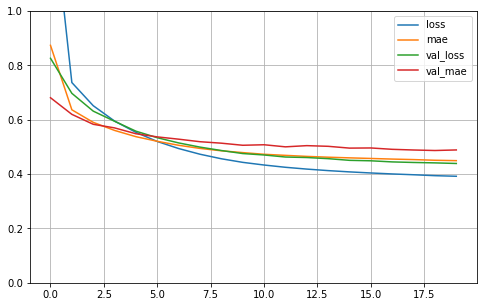

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### As we see the graph is still going down, meaning that if we run some more epochs, this will further decrease the loss and improve the accuracy of our model.

### Note - Keras have the weights and biass value in memory, so if we rerun the code again it will not start training from the start, it will start training from last position only.

In [22]:
# rerunning same code for 20 more epochs i.e total 40 epochs
model_history =model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 624us/step - loss: 0.3894 - mae: 0.4483 - val_loss: 0.4350 - val_mae: 0.4829
Epoch 2/20
363/363 [==============================] - 0s 560us/step - loss: 0.3872 - mae: 0.4463 - val_loss: 0.4379 - val_mae: 0.4901
Epoch 3/20
363/363 [==============================] - 0s 558us/step - loss: 0.3853 - mae: 0.4457 - val_loss: 0.4337 - val_mae: 0.4815
Epoch 4/20
363/363 [==============================] - 0s 569us/step - loss: 0.3830 - mae: 0.4437 - val_loss: 0.4348 - val_mae: 0.4875
Epoch 5/20
363/363 [==============================] - 0s 569us/step - loss: 0.3816 - mae: 0.4426 - val_loss: 0.4309 - val_mae: 0.4805
Epoch 6/20
363/363 [==============================] - 0s 566us/step - loss: 0.3794 - mae: 0.4416 - val_loss: 0.4308 - val_mae: 0.4801
Epoch 7/20
363/363 [==============================] - 0s 560us/step - loss: 0.3781 - mae: 0.4403 - val_loss: 0.4292 - val_mae: 0.4794
Epoch 8/20
363/363 [==============================] - 0s 560us

In [23]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 400us/step - loss: 0.3861 - mae: 0.4524


#### Here we see the decrement in loss from 40 to 38

In [24]:
model_history.history

{'loss': [0.3893730938434601,
  0.38719499111175537,
  0.3852682411670685,
  0.3830026090145111,
  0.38159120082855225,
  0.37943801283836365,
  0.37812933325767517,
  0.3764858841896057,
  0.3749067485332489,
  0.3733694851398468,
  0.37244096398353577,
  0.3709791898727417,
  0.3698503375053406,
  0.3686806559562683,
  0.36762359738349915,
  0.3665948808193207,
  0.3652607500553131,
  0.3647005558013916,
  0.36319971084594727,
  0.36240020394325256],
 'mae': [0.4482833743095398,
  0.44631659984588623,
  0.44572460651397705,
  0.4437309205532074,
  0.4426022171974182,
  0.44158807396888733,
  0.4403378665447235,
  0.4392853081226349,
  0.43872252106666565,
  0.43780314922332764,
  0.43629753589630127,
  0.4357509911060333,
  0.43475717306137085,
  0.43383893370628357,
  0.4334556460380554,
  0.4328222870826721,
  0.43188223242759705,
  0.4311762750148773,
  0.4300403594970703,
  0.4295453429222107],
 'val_loss': [0.43495824933052063,
  0.4378911256790161,
  0.43371012806892395,
  0.43

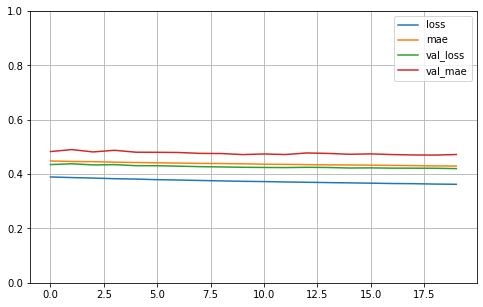

In [25]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Now we can see that lines the lines is flattened out. it means we have achive the convergence in model.

### Predicting values in new dataset

In [27]:
# creating sample of first 3 values of X dataset
X_new =X_test[:3]

In [28]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.8231531]
 [1.9255586]
 [4.7815685]]
[0.477   0.458   5.00001]


## Saving and Resoring Model

In [29]:
model.save("Regression model using keras.")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Regression model using keras.\assets


### Location

In [30]:
%pwd

'C:\\Users\\Admin'

In [31]:
del model

In [32]:
keras.backend.clear_session()

In [33]:
model = keras.models.load_model("Regression model using keras.")

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________
